## Simulated Annealing on the Traveling Salesman problem##

 States: A full path represented as a list for the order of cities to travel. For example, [0,1,0] says "Go from city 0 to city 1 to city 0".

In [57]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

def SA_TS(dist_mat, T, start_city, mean, sd):

    # Total distance for current path
    def objective_function(dist_mat, state):
        cost = 0
        for i in range(len(state) - 2):
            cost += dist_mat[state[i], state[i+1]]
        cost += dist_mat[state[-1],state[-2]]
        return cost
    
    def switch_two_cities(state):
        a = random.randint(1, len(state)-2)
        b = random.randint(1, len(state)-2)
        while b == a:
            b = random.randint(1, len(state)-2)
        state[a], state[b] = state[b], state[a]
        return state
               
    # Initial path: 0 -> 1, 1 -> 2, ... N-1 -> N
    initial = [i for i in range(len(dist_mat))]
    initial.append(start_city)
    distance_array = []
    
    path = initial 
    current_distance = objective_function(dist_mat, path)
    best_distance = current_distance
    best_path = initial
    
    for t in range(T,1,-1):
        
        distance_array.append(current_distance)
        new_path = switch_two_cities(path)
        
        new_distance = objective_function(dist_mat, new_path)
        E = current_distance - new_distance
                
        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path
        
        # new path is shorter
        if E > 0:
            current_distance = new_distance
            path = new_path
            
        else:
            
            temp = (t+1)/T
                        
            if temp == 0:
                
                plt.plot(distance_array)
                plt.title('Search path (by objective function)')
                plt.ylabel('Path distance')
                plt.xlabel('Temperature (iteration)')
                plt.show()
                
                return best_path, best_distance
            
            Z = (E-mean)/sd
            p = np.exp(Z/temp)

            if np.random.binomial(1, p) == 1:
                current_distance = new_distance
                path = new_path
        
    plt.plot(distance_array)
    plt.title('Search path (by objective function)')
    plt.ylabel('Path distance')
    plt.xlabel('Temperature (iteration)')
    plt.show()
    
    return best_path, best_distance

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8970.0,28590.0,8230.0,2530.0,5600.0,9710.0,9950.0,2640.0,7490.0,7810.0,9790.0,7460.0,6890.0
1,10860.0,2350.0,6430.0,16070.0,650.0,3450.0,5720.0,2160.0,3490.0,5210.0,13750.0,3130.0,4570.0
2,140.0,4160.0,1500.0,10040.0,12190.0,4880.0,13120.0,7530.0,7000.0,2640.0,5500.0,4930.0,15310.0
3,10180.0,10740.0,0.0,6540.0,8400.0,2730.0,9110.0,3180.0,2950.0,5370.0,12800.0,4910.0,20050.0
4,1440.0,3410.0,23310.0,1420.0,11350.0,1610.0,9520.0,4930.0,2020.0,14020.0,10890.0,9790.0,3170.0
5,290.0,2750.0,9490.0,3550.0,30000.0,3340.0,8490.0,620.0,3620.0,7940.0,510.0,3470.0,6710.0
6,3340.0,10500.0,3370.0,7150.0,8040.0,1700.0,9840.0,1410.0,25860.0,4120.0,3110.0,7480.0,8840.0
7,11060.0,12450.0,1270.0,5610.0,9600.0,10170.0,6070.0,9540.0,220.0,4450.0,10950.0,5110.0,1260.0
8,14440.0,12390.0,23270.0,3450.0,1310.0,5140.0,11100.0,11340.0,3220.0,4450.0,2970.0,15800.0,280.0
9,1860.0,5830.0,10710.0,6660.0,19230.0,4030.0,6530.0,3190.0,7100.0,220.0,6200.0,2200.0,7360.0


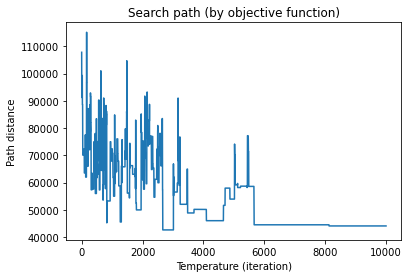

([0, 5, 3, 10, 11, 2, 7, 6, 8, 1, 4, 12, 9, 0], 42600.0)

In [58]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = round(distance,-1)
    return distance_matrix

T = 10000
mean = 100
sd = 10000
distance_matrix = pd.DataFrame(write_distance_matrix(13, mean, sd))
display(distance_matrix)

SA_TS(distance_matrix.to_numpy(), T, start_city = 0, mean = sd, sd = sd)